In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [59]:
sourceImage = cv.imread('revolta_da_vacina.png', cv.IMREAD_GRAYSCALE)
finalImage = sourceImage[100:800,0:700]

In [13]:
frameInicial = cv.cvtColor(sourceImage1, cv.cv2.COLOR_BGR2YCrCb)[:, :, 0]

In [12]:
cv.imwrite('./documentImages/original.png', finalImage)

True

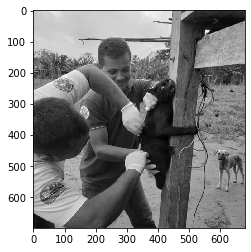

In [10]:
plt.imshow(finalImage,cmap="gray")

In [60]:
h,w = (np.array(finalImage.shape[:2])/8 * 8).astype(int)

In [54]:
sourceImage = sourceImage[:h,:w]

In [45]:
sourceImage

array([[117, 117, 116, ..., 139, 138, 138],
       [117, 117, 117, ..., 138, 138, 138],
       [117, 117, 117, ..., 139, 138, 138],
       ...,
       [ 43,  44,  43, ...,  41,  44,  49],
       [ 42,  44,  43, ...,  38,  41,  48],
       [ 48,  51,  54, ...,  36,  40,  47]], dtype=uint8)

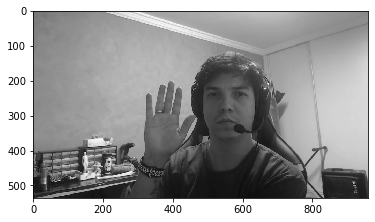

In [4]:
plt.imshow(sourceImage,cmap="gray")

In [61]:
dct = cv.dct(finalImage.astype(float))

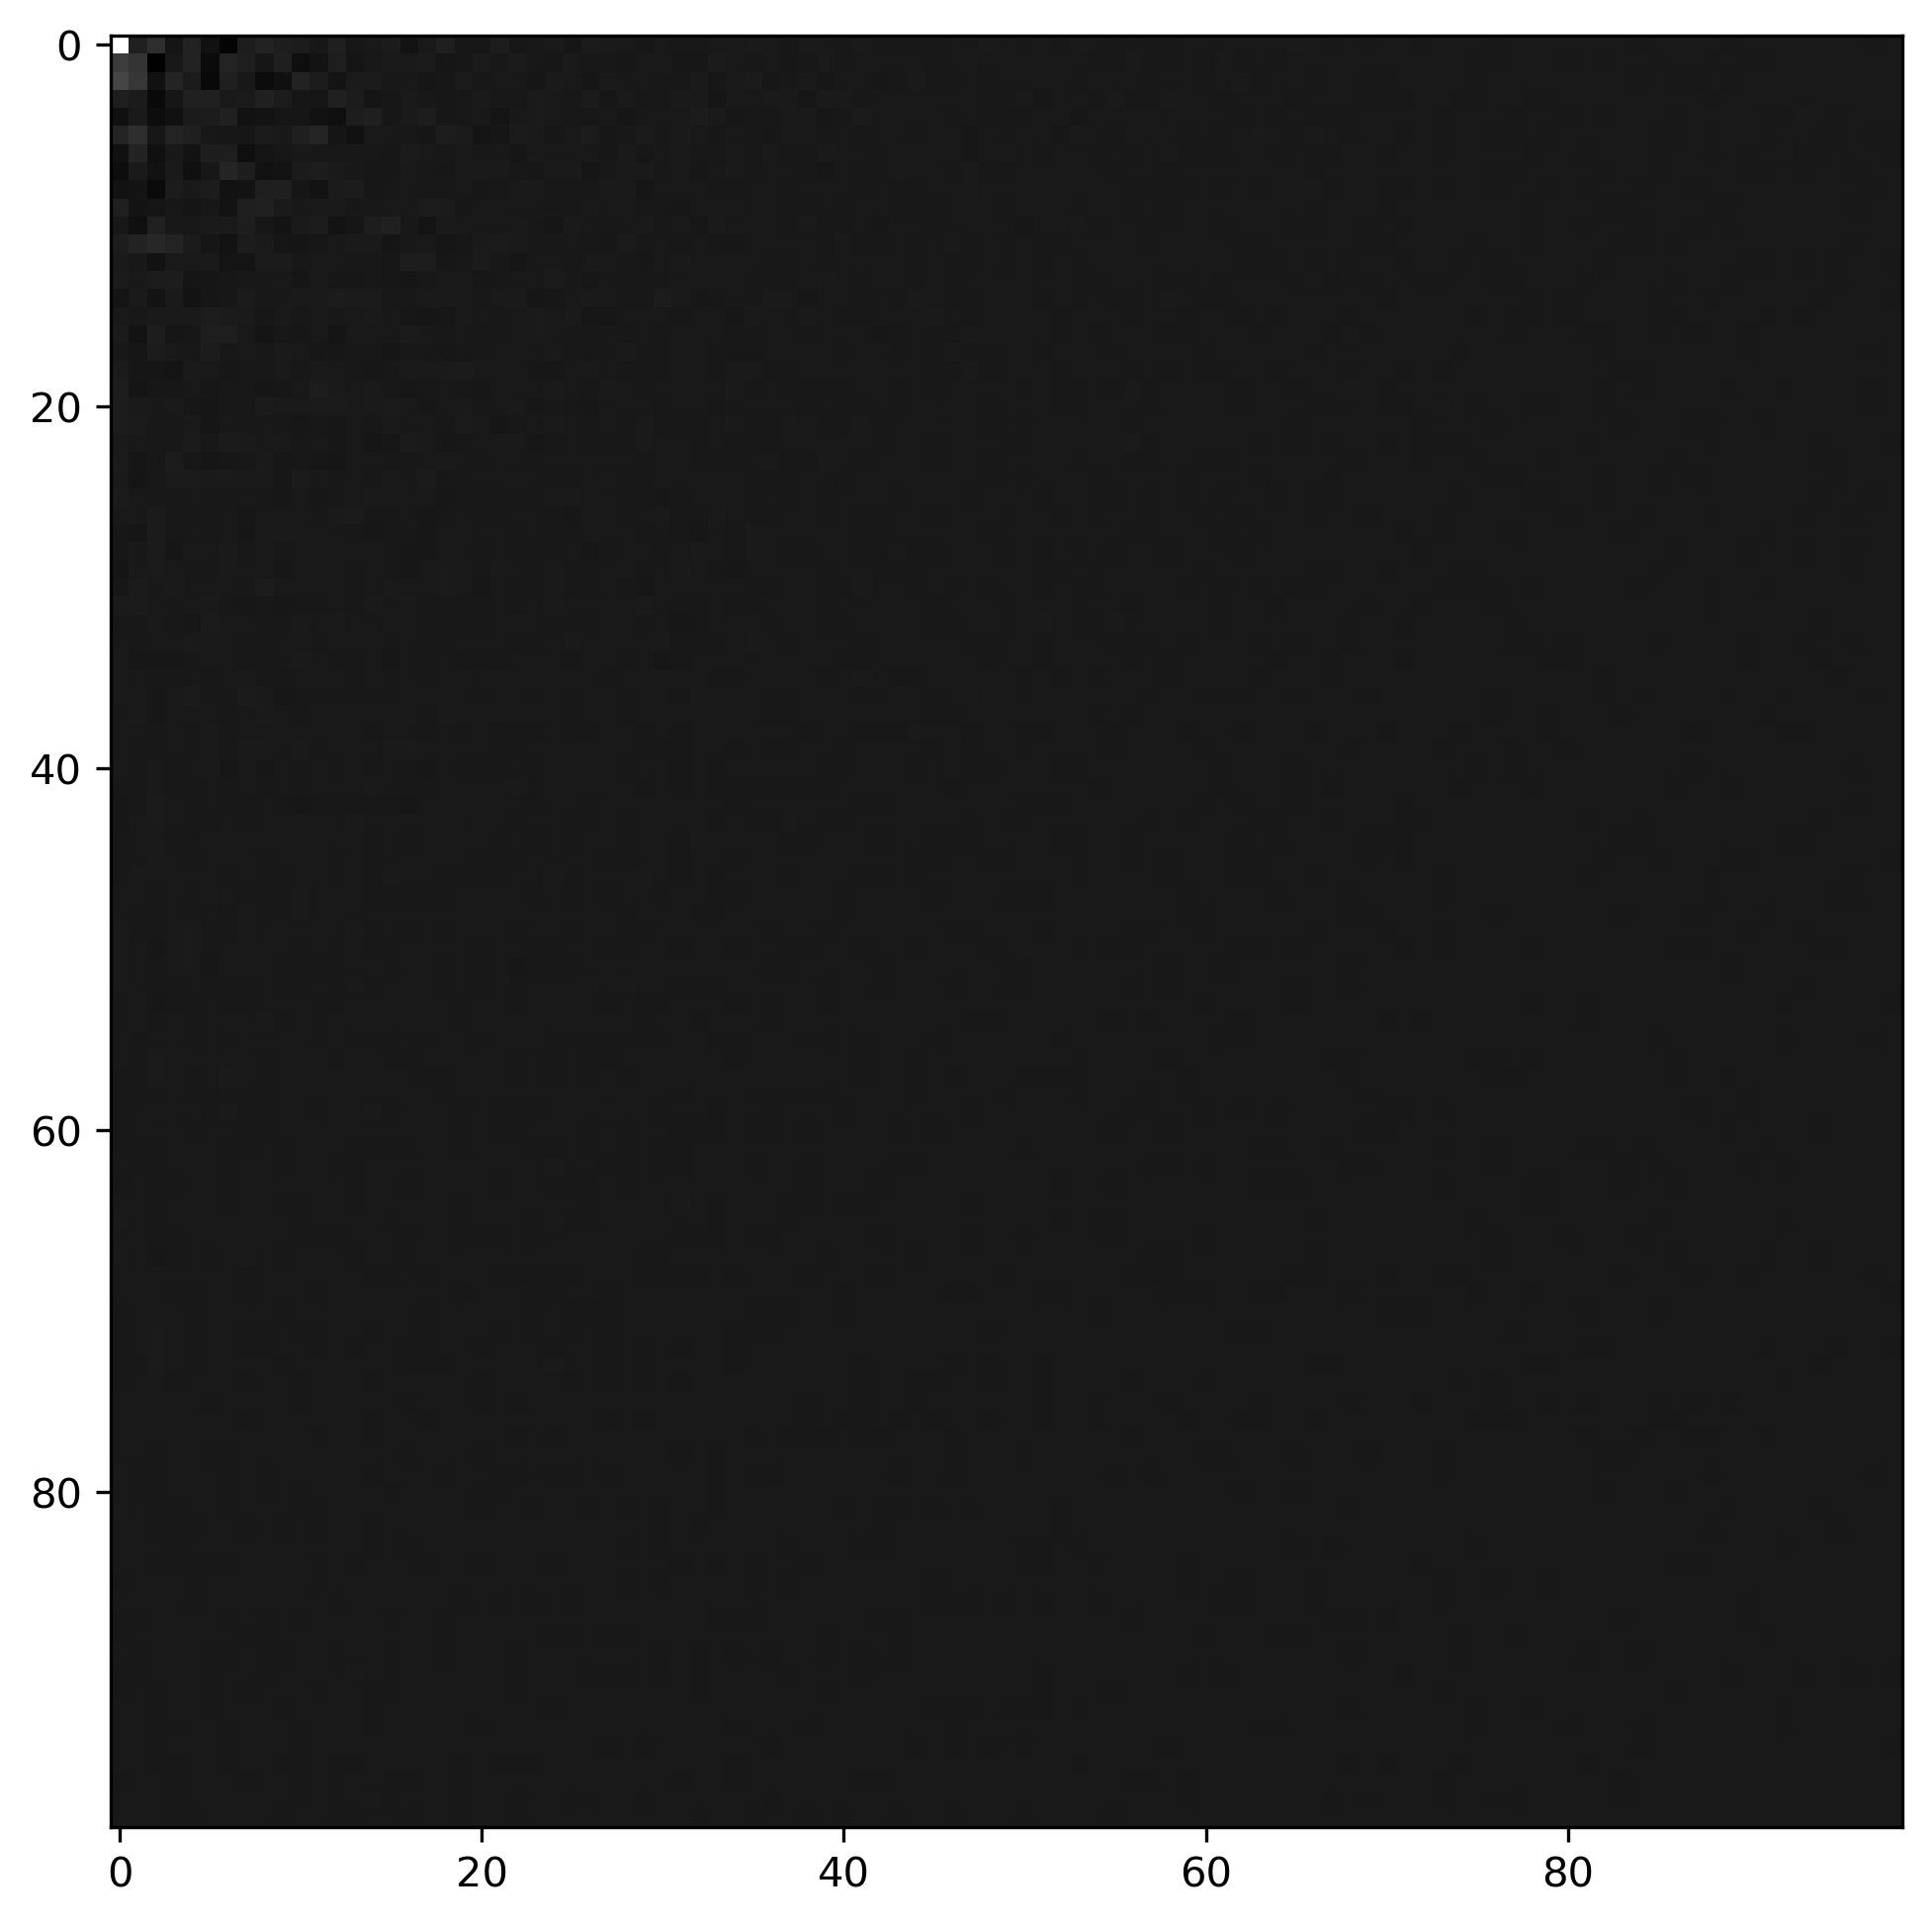

In [35]:
from matplotlib.pyplot import figure

figure(figsize=(8, 8), dpi=300)

plt.imshow(dct[0:99,0:99],cmap="gray")
plt.savefig('./documentImages/dct100x100.png')

In [17]:
cv.imwrite('./documentImages/dct50x50.png', dct[0:50, 0:50])

True

In [63]:
lh = int(round(10 - ((compressRatio/100) * h)))
lw = int(round(10 - ((compressRatio/100) * w)))

NameError: name 'compressRatio' is not defined

In [132]:
print(lh,lw)

214 384


In [55]:
B = 100

blocksV = int(h/B) #definindo numero de blocos na vertical
blocksH = int(w/B) #definindo numero de blocos na horizontal

sourceVis = np.zeros((blocksV*B,blocksH*B)) #matriz "holder" de zeros para a visualizacao da imagem original
transformed = np.zeros((blocksV*B,blocksH*B)) #matriz "holder" de zeros para a imagem transformada

sourceVis[:blocksV*B,:blocksH*B] = sourceImage[:blocksV*B,:blocksH*B] #copia da imagem original com o tamanho correto

print(sourceVis.shape)

#aplicacao da DCT em cada bloco de BxB da imagem
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv.dct(sourceVis[row*B:(row+1)*B,col*B:(col+1)*B])
                currentblock[10:100,10:100] = 0
                transformed[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock

(500, 900)


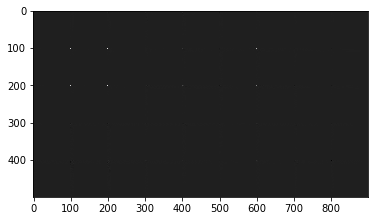

In [56]:
plt.imshow(transformed,cmap="gray")

In [57]:
backTransformed = np.zeros((blocksV*B,blocksH*B)) #matriz "holder" de zeros para a guardar a inversa da DCT

#aplicando a inversa da DCT com o objetivo de ter a imagem original
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv.idct(transformed[row*B:(row+1)*B,col*B:(col+1)*B])
                backTransformed[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock

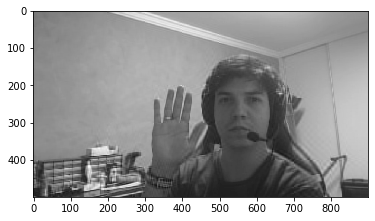

In [58]:

plt.imshow(backTransformed,cmap="gray")

In [82]:
diff = sourceVis - backTransformed
diffsq = diff**2
tam = diffsq.shape[0] * diffsq.shape[1]

MSE = np.sum(diffsq)/tam
print(MSE)

33.495329957840084


In [89]:
PSNR = (20 * np.log10(255)) - (10 * np.log10(MSE))

In [90]:
PSNR

32.88096100545138

In [61]:
np.sum(a**2) / np.sum(a**2)

Image original size:    0.491 MB
Image original size:    0.429 MB


In [62]:
plt.imshow(dct[0:50,0:50],cmap="gray")

NameError: name 'dct' is not defined

In [62]:
compressRatio = 95

In [63]:
lh = int(round(h - ((compressRatio/100) * h)))
lw = int(round(w - ((compressRatio/100) * w)))

In [64]:
print(lh, lw)

35 34


In [66]:
for i in range(10,100, 10):
    print(i)

10
20
30
40
50
60
70
80
90


In [56]:
dct[lh:h, lw:w] = 0

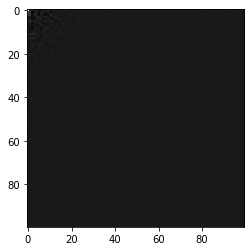

In [45]:
plt.imshow(dct[0:100,0:100],cmap="gray")

In [57]:
idct = cv.idct(dct)

True

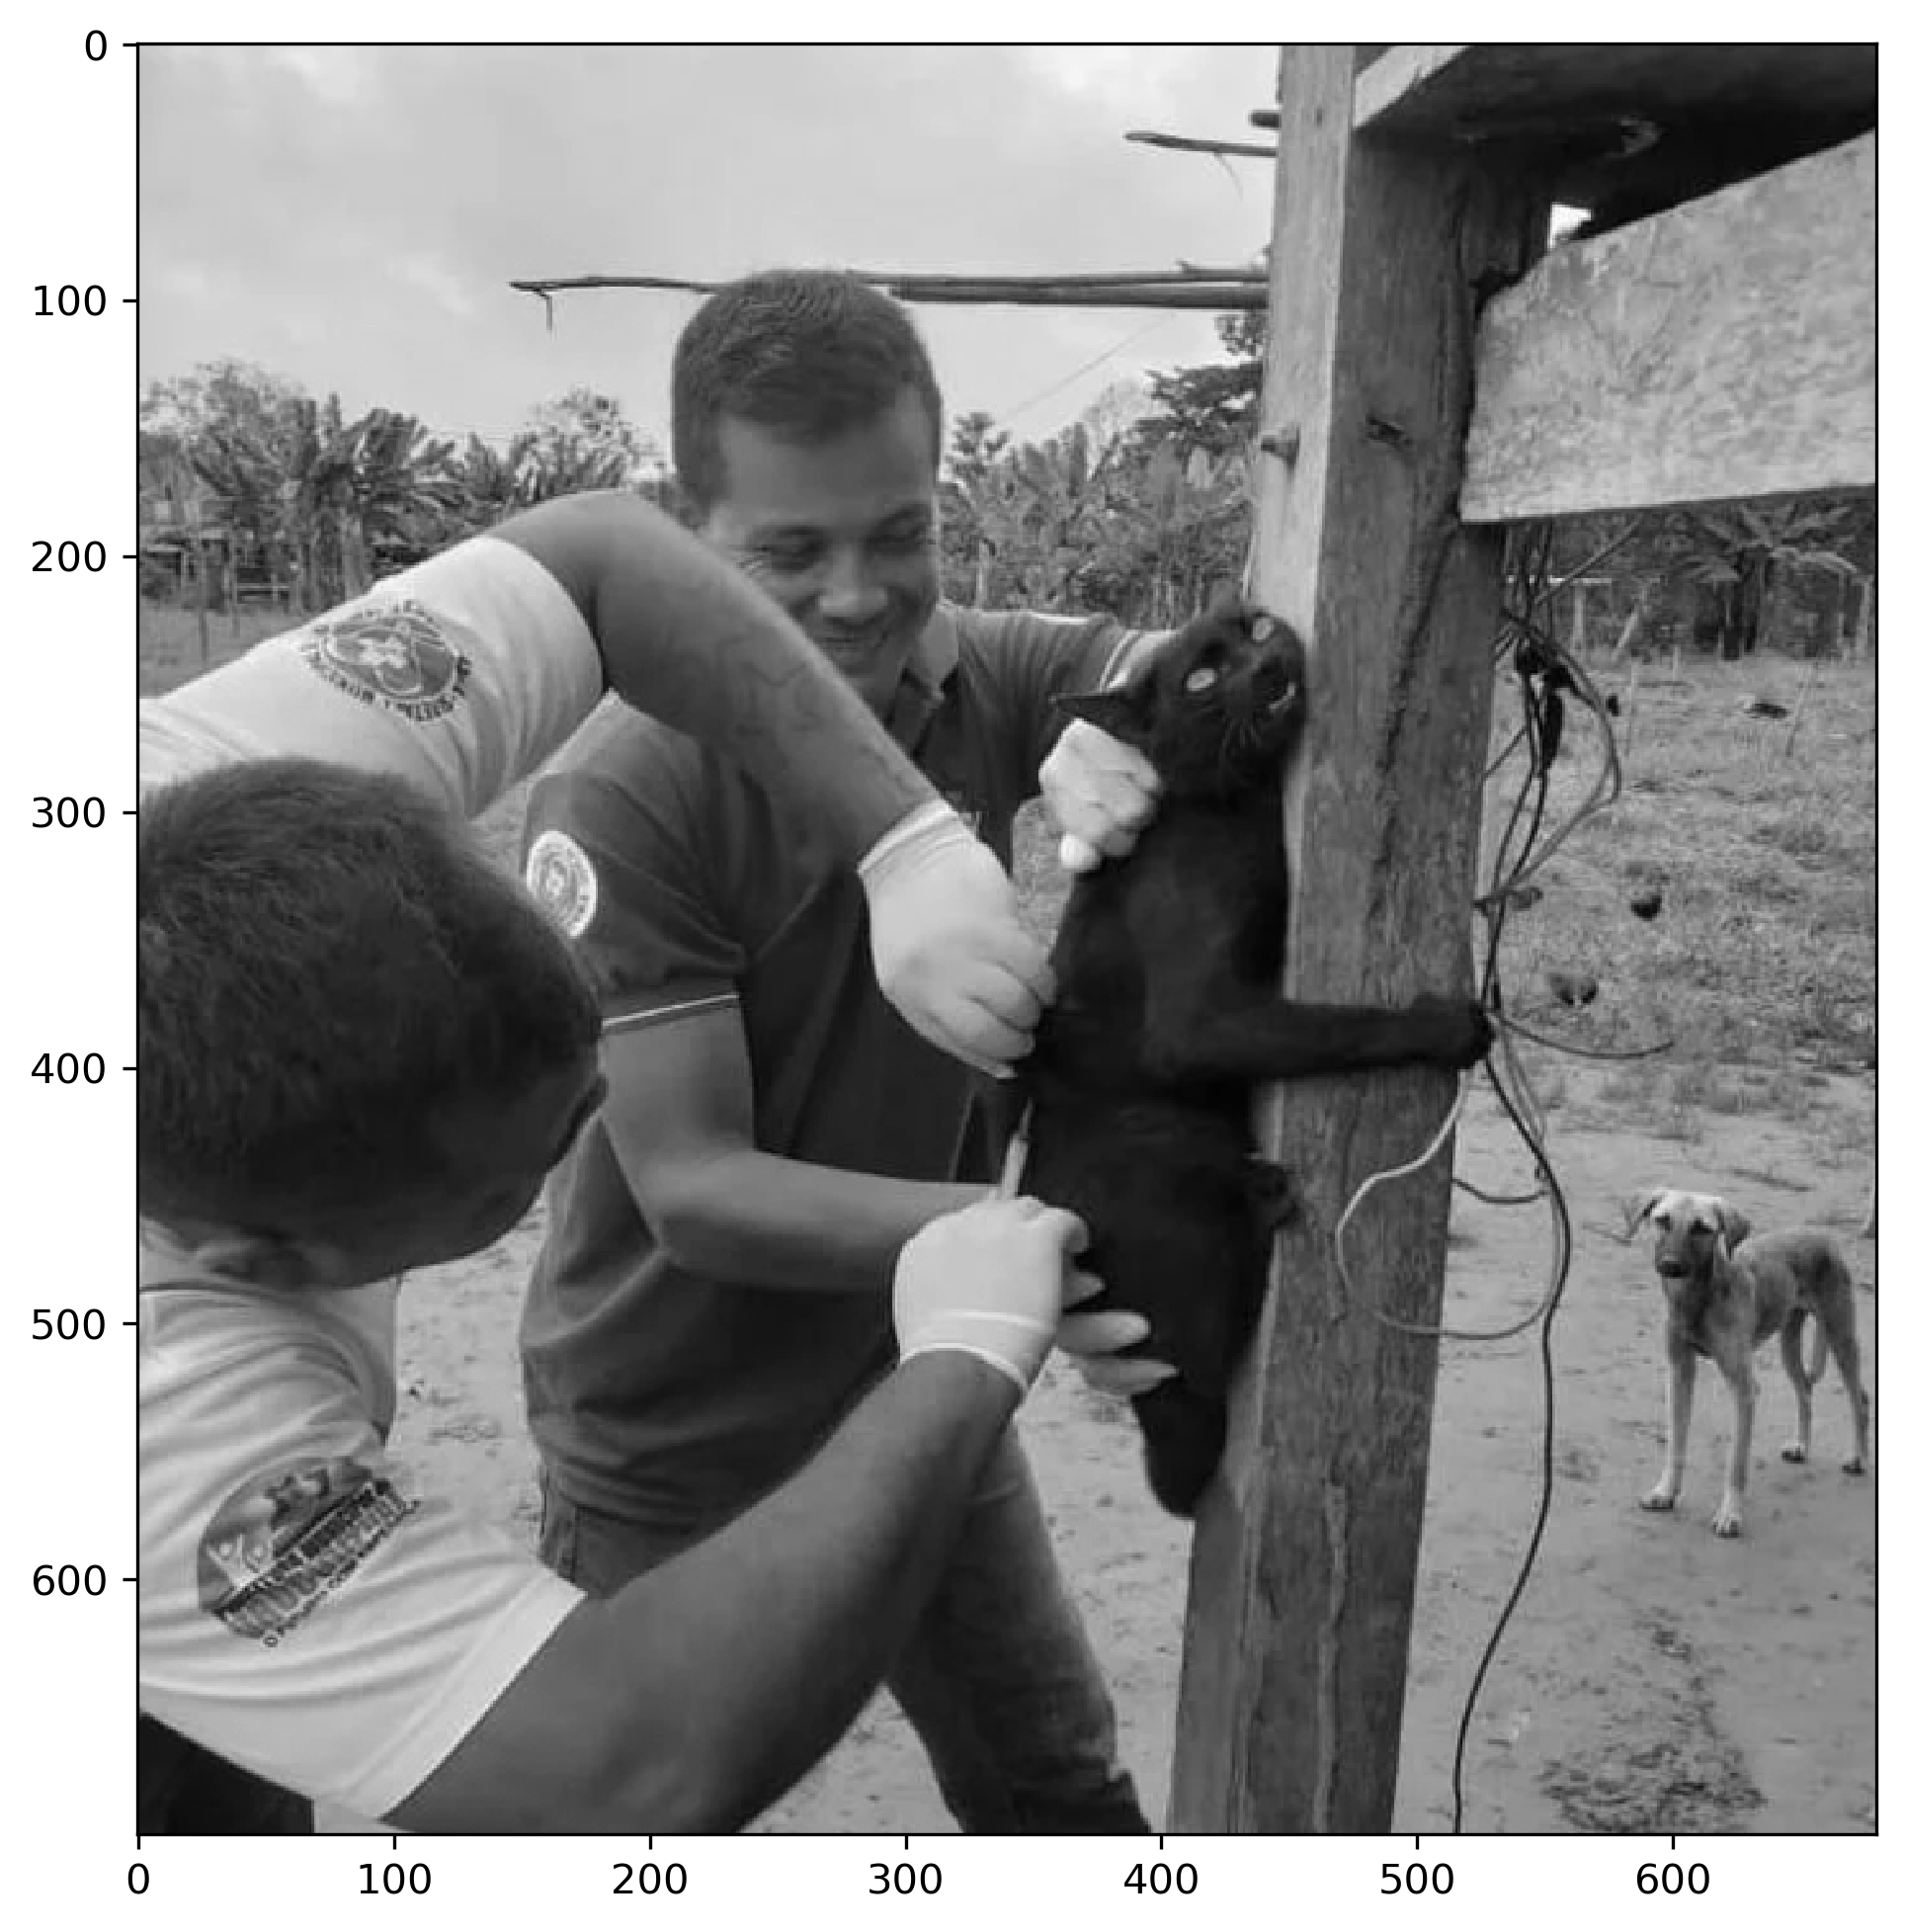

In [58]:
from matplotlib.pyplot import figure

figure(figsize=(8, 8), dpi=300)

plt.imshow(idct,cmap="gray")
cv.imwrite('./documentImages/idct50.png', idct)

In [2]:
import time

In [11]:
start = time.process_time()

In [12]:
final = time.process_time() - start

0.01249992600000005

In [16]:
timeaggr = final * 2 / 2
timeaggr

0.01249992600000005

In [10]:
plt.imshow(sourceImage,cmap="gray")

NameError: name 'plt' is not defined

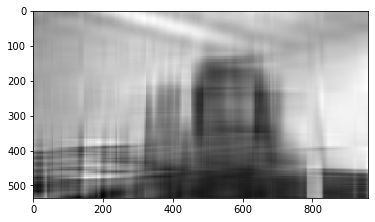

In [155]:
plt.imshow(idct,cmap="gray")

In [78]:
a = np.ndarray([[1,2,3],[4,5,6],[7,8,9]])
b = np.ndarray([[6,7,2],[-4,6,-6],[10,29,3]])

TypeError: 'list' object cannot be interpreted as an integer

In [74]:
c = a - b

In [76]:
c

array([[ -5,  -5,   1],
       [  8,  -1,  12],
       [ -3, -21,   6]])

In [80]:
np.sum(c**2) / np.sum(a**2)

2.617543859649123